### Лабораторная работа №1
### Вариант 5

In [20]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats

TOTAL_RADIATED_ENERGY = 'Total Radiated Energy (J)'
LATITUDE = 'Latitude (deg.)'
LONGITUDE = 'Longitude (deg.)'
ALTITUDE = 'Altitude (km)'
VELOCITY = 'Velocity (km/s)'
PEAK_BRIGHTNESS = 'Peak Brightness Date/Time (UT)'

x = pd.read_csv('cneos_fireball_data.csv')
data_pandas = pd.DataFrame(x)
data_pandas.head()

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
0,2017-07-31 22:01:35,24.7N,118.5W,NaN,NaN,NaN,NaN,NaN,5.800000e+10,0.19
1,2017-07-23 06:12:38,6.6S,69.7W,38.0,17.2,-0.4,8.7,-14.8,3.500000e+10,0.12
2,2017-07-13 09:30:36,23.1N,60.7E,35.0,13.7,-10.0,-6.5,-6.8,7.300000e+10,0.23
3,2017-06-30 14:26:45,34.3S,134.5E,20.0,15.2,10.9,-9.7,4.2,9.400000e+10,0.29
4,2017-06-23 20:21:55,57.0N,143.7E,35.1,24.3,17.7,13.1,-10.3,1.840000e+11,0.52


### 1)Местоположение появления метеорита с наибольшим количеством высвободившейся энергии:

In [21]:
max_radiated_energy = data_pandas[TOTAL_RADIATED_ENERGY].max()
data_pandas[data_pandas[TOTAL_RADIATED_ENERGY] == max_radiated_energy][[LATITUDE, LONGITUDE, ALTITUDE, TOTAL_RADIATED_ENERGY]]

,Latitude (deg.),Longitude (deg.),Altitude (km),Total Radiated Energy (J)
146,54.8N,61.1E,23.3,3.750000e+14


### 2)Определите метеорит с максимальной и минимальной скоростью:

#### Max:

In [22]:
max_velocity = data_pandas[VELOCITY].max()
data_pandas[data_pandas[VELOCITY] == max_velocity]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
67,2015-07-04 01:40:11,38.6N,103.1E,46.3,49.0,0.9,-40.4,-27.7,5.600000e+10,0.18


#### Min:

In [23]:
min_velocity = data_pandas[VELOCITY].min()
data_pandas[data_pandas[VELOCITY] == min_velocity]

,Peak Brightness Date/Time (UT),Latitude (deg.),Longitude (deg.),Altitude (km),Velocity (km/s),vx,vy,vz,Total Radiated Energy (J),Calculated Total Impact Energy (kt)
300,2008-07-01 17:40:19,37.1N,115.7W,36.1,9.8,2.8,1.7,-9.2,3.600000e+10,0.12


### 3)Определите место максимальной концентрации метеоритов:

In [30]:
import gmaps
import gmaps.datasets

gmaps.configure(api_key="AI...")

max_count = 0
accuracy = 3
side_of_the_square = 20
center = side_of_the_square / 2.0

def get_latitude(self):
    coord = str(self[LATITUDE])
    direction = coord[-1]
    if direction == 'S':
        return float('-' + coord[:-1])
    return float(coord[:-1])

def get_longitude(self):
    coord = str(self[LONGITUDE])
    direction = coord[-1]
    if direction == 'W':
        return float('-' + coord[:-1])
    return float(coord[:-1])

data_frame = data_pandas[[LATITUDE, LONGITUDE]].dropna(subset=[LATITUDE, LONGITUDE])
data_frame[LATITUDE] = data_frame.apply(get_latitude, axis=1)
data_frame[LONGITUDE] = data_frame.apply(get_longitude, axis=1)

result = []
coords = [[]]
for i in np.arange(data_frame[LATITUDE].min(), data_frame[LATITUDE].max(), accuracy):
    for j in np.arange(data_frame[LONGITUDE].min(), data_frame[LONGITUDE].max(), accuracy):
        max_df = data_frame[(data_frame[LATITUDE] <= i + center) &
                            (data_frame[LATITUDE] > i - center) &
                            (data_frame[LONGITUDE] <= j + center) &
                            (data_frame[LONGITUDE] > j - center)]
        count = max_df.shape[0]
        if  count > max_count:
            max_count = count
            result.clear()
            coords.clear()
            coords.append([(i + center, j + center), (i - center, j + center), (i - center, j - center), (i + center, j - center)])
            result.append(max_df)
        elif max_count == count:
            result.append(max_df)
            coords.append([(i + center, j + center), (i - center, j + center), (i - center, j - center), (i + center, j - center)])

df = pd.concat(result)

df1 = data_frame[(~data_frame[LATITUDE].isin(df[LATITUDE]))&(~data_frame[LONGITUDE].isin(df[LONGITUDE]))]

fig = gmaps.figure()
layer1 = gmaps.symbol_layer(df, fill_color="red", stroke_color="red", scale=2)
layer2 = gmaps.symbol_layer(df1, fill_color="blue", stroke_color="blue", scale=2)
for i in range(len(result)):
    fig.add_layer(gmaps.drawing_layer(features=[gmaps.Polygon(coords[i])], show_controls=False))
fig.add_layer(layer1)
fig.add_layer(layer2)
fig

Figure(layout=FigureLayout(height='420px'))

### 4)Определите время года, в которое вероятность появления метеоритов максимальна. Постройте график:

Season: Autumn(probability = 0.253129346314)


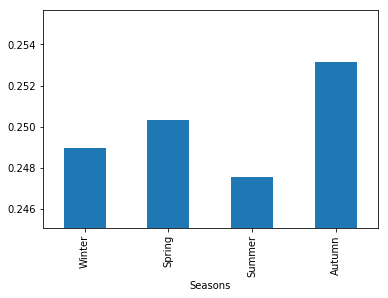

In [31]:
def get_month(self):
    return str(self[PEAK_BRIGHTNESS])[5:7]

data_frame = data_pandas.copy()
data_frame[PEAK_BRIGHTNESS] = data_frame.apply(get_month, axis=1)
data_frame = data_frame.groupby(PEAK_BRIGHTNESS)[[PEAK_BRIGHTNESS]].count()
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']
values = [(data_frame.iloc[0, 0] + data_frame.iloc[1, 0] + data_frame.iloc[11, 0]) / len(data_pandas),
         (data_frame.iloc[2, 0] + data_frame.iloc[3, 0] + data_frame.iloc[4, 0]) / len(data_pandas),
         (data_frame.iloc[5, 0] + data_frame.iloc[6, 0] + data_frame.iloc[7, 0]) / len(data_pandas),
         (data_frame.iloc[8, 0] + data_frame.iloc[9, 0] + data_frame.iloc[10, 0]) / len(data_pandas)]
print("Season: " + str(seasons[values.index(max(values))]) + "(probability = " + str(max(values)) + ")")
helper = pd.DataFrame(dict([('Seasons', seasons), ('Values', values)]))
helper.plot(kind='bar', x='Seasons', ylim=((min(values)) * 0.99, max(values) * 1.01), legend=None)
plt.show()

### 5)Удалите строки данных, в которых для метеоритов не указана скорость:

In [32]:
data_frame = data_pandas.copy()
data_frame = data_frame.dropna(subset=[VELOCITY])
data_frame.shape

(157, 10)

### 6)Построить график, на котором по оси ОХ отложено время суток, по OY – частота появления метеоритов:

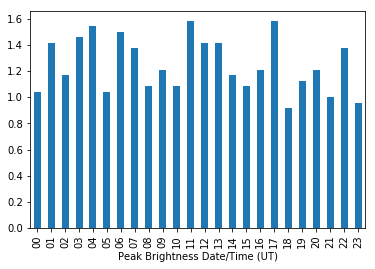

In [33]:
def get_hour(self):
    return str(self[PEAK_BRIGHTNESS])[11:13]
def calculate_frequency(self):
    return int(self[PEAK_BRIGHTNESS])/len(data_frame)

data_frame = data_pandas.copy()
data_frame[PEAK_BRIGHTNESS] = data_frame.apply(get_hour,axis=1)
data_frame = data_frame.groupby(PEAK_BRIGHTNESS)[[PEAK_BRIGHTNESS]].count()
data_frame[PEAK_BRIGHTNESS] = data_frame.apply(calculate_frequency,axis=1)
data_frame.plot(kind='bar', legend=None)
plt.show()

### 7)Заполните строки в которых для метеоритов не указана скорость:

In [34]:
data_frame = data_pandas.copy()
low_value = data_frame[VELOCITY].min()
high_value = data_frame[VELOCITY].max()
data_frame[VELOCITY] = data_frame[VELOCITY].fillna(np.random.uniform(low=low_value,high=high_value))
data_frame[VELOCITY].isnull().any()

False

### 8)Определите месяц года, для которого появление метеоритов наиболее вероятно (постройте необходимые графики):

Minimum: month #10


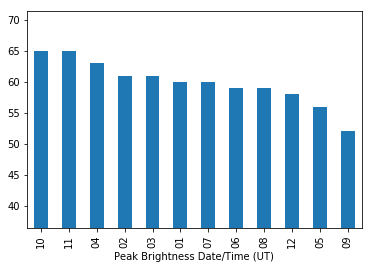

In [35]:
def get_month(self):
    return str(self[PEAK_BRIGHTNESS])[5:7]

data_frame = data_pandas.copy()
data_frame[PEAK_BRIGHTNESS] = data_pandas.apply(get_month,axis=1)
data_frame = data_frame.groupby(PEAK_BRIGHTNESS)[[PEAK_BRIGHTNESS]].count()
data_frame = data_frame.sort_values(by=PEAK_BRIGHTNESS,ascending=False)
print('Minimum: month #' + str(data_frame.index[0]))
data_frame.plot(kind='bar', legend=None, ylim=(min(data_frame[PEAK_BRIGHTNESS] * 0.7),max(data_frame[PEAK_BRIGHTNESS] * 1.1)))
plt.show()

### 9)Вычислите корреляцию Пирсона и Спирмена между признаками Altitude и Total Radiated Energy. Сравните полученные величины корреляции. Постройте гистограммы для указанных признаков. Оцените значение p-value.:

In [36]:
data_frame = data_pandas.dropna(subset=[ALTITUDE, TOTAL_RADIATED_ENERGY])

pearson_correlation, pearson_pvalue = stats.pearsonr(data_frame[ALTITUDE], data_frame[TOTAL_RADIATED_ENERGY])
print('Pearson:')
print('Correlation - ', pearson_correlation)
print('p-value - ', pearson_pvalue)

spearman_correlation, spearman_pvalue = stats.spearmanr(data_frame[ALTITUDE], data_frame[TOTAL_RADIATED_ENERGY])
print('\nSpearman:')
print('Correlation - ', spearman_correlation)
print('p-value - ', spearman_pvalue)

Pearson:
Correlation -  -0.0857865652582
p-value -  0.133682698787

Spearman:
Correlation -  -0.126710419392
p-value -  0.0264157286107


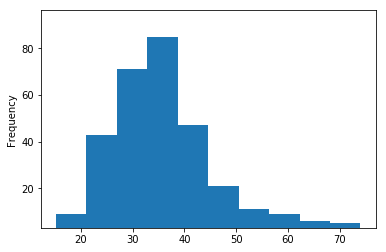

In [37]:
data_frame[ALTITUDE].plot(kind='hist', legend=None, ylim=(min(data_frame[ALTITUDE] * 0.2),max(data_frame[ALTITUDE] * 1.3)))
plt.show()

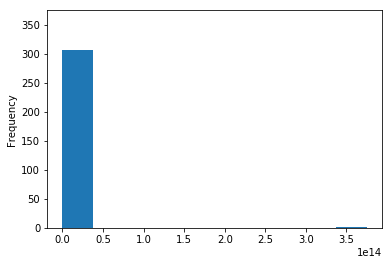

In [38]:
data_frame[TOTAL_RADIATED_ENERGY].plot(kind='hist',
        legend=None, 
        ylim=(min(data_frame[TOTAL_RADIATED_ENERGY] * 0.000000000001),max(data_frame[TOTAL_RADIATED_ENERGY] * 0.000000000001)))
plt.show()